# ***Comparison Notebook***
Here I have finetuned Autoencoder,Vision Transformer and CNN here CNN and Autoencoder structure was self written but the Vision Transformer was imported.

Training CNN...
CNN Epoch: 0 [0/60000 Loss: 2.305755]
CNN Epoch: 0 [6400/60000 Loss: 0.466306]
CNN Epoch: 0 [12800/60000 Loss: 0.491107]
CNN Epoch: 0 [19200/60000 Loss: 0.420005]
CNN Epoch: 0 [25600/60000 Loss: 0.548836]
CNN Epoch: 0 [32000/60000 Loss: 0.410048]
CNN Epoch: 0 [38400/60000 Loss: 0.296883]
CNN Epoch: 0 [44800/60000 Loss: 0.366552]
CNN Epoch: 0 [51200/60000 Loss: 0.355129]
CNN Epoch: 0 [57600/60000 Loss: 0.478880]
CNN Epoch: 1 [0/60000 Loss: 0.380788]
CNN Epoch: 1 [6400/60000 Loss: 0.499628]
CNN Epoch: 1 [12800/60000 Loss: 0.318377]
CNN Epoch: 1 [19200/60000 Loss: 0.377991]
CNN Epoch: 1 [25600/60000 Loss: 0.164460]
CNN Epoch: 1 [32000/60000 Loss: 0.165759]
CNN Epoch: 1 [38400/60000 Loss: 0.358579]
CNN Epoch: 1 [44800/60000 Loss: 0.189512]
CNN Epoch: 1 [51200/60000 Loss: 0.343194]
CNN Epoch: 1 [57600/60000 Loss: 0.390474]
CNN Epoch: 2 [0/60000 Loss: 0.281232]
CNN Epoch: 2 [6400/60000 Loss: 0.298426]
CNN Epoch: 2 [12800/60000 Loss: 0.153463]
CNN Epoch: 2 [19200/60000 Loss: 0

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Analyzing T-shirt/top

Comparing with other T-shirt/top images:
--------------------------------------------------


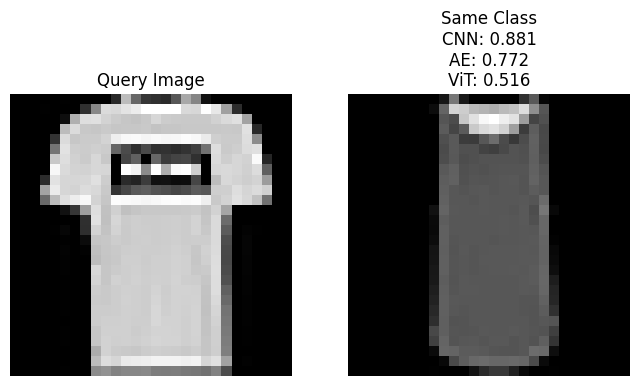

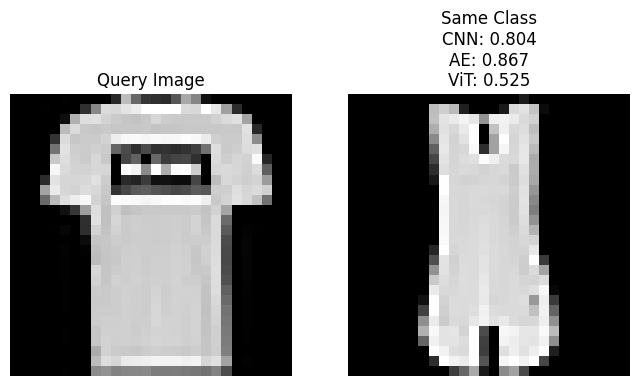

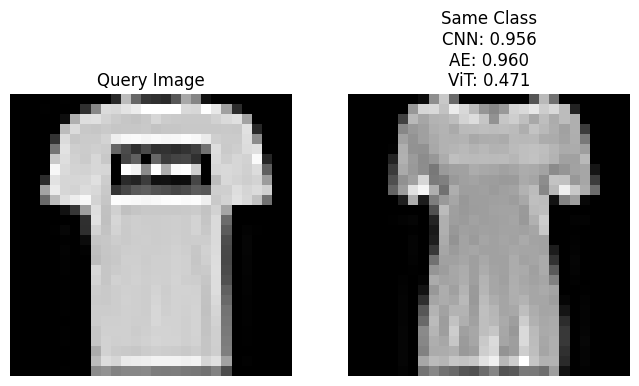

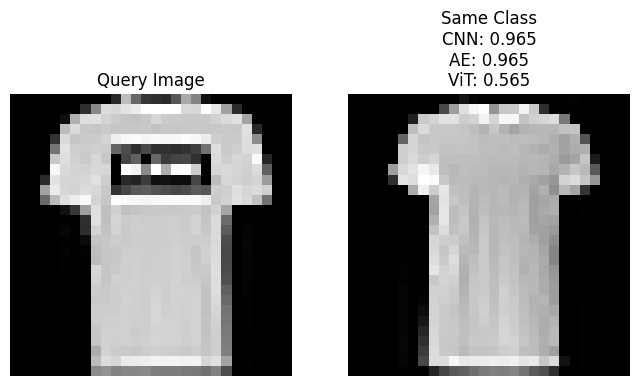

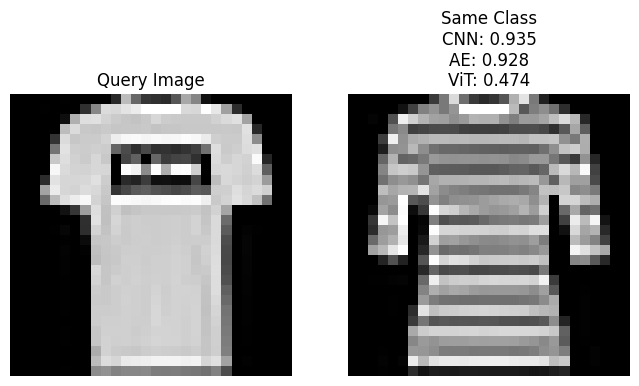


Comparing with other class images:
--------------------------------------------------


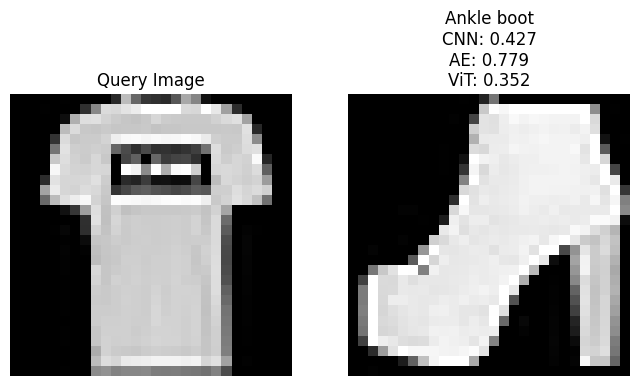

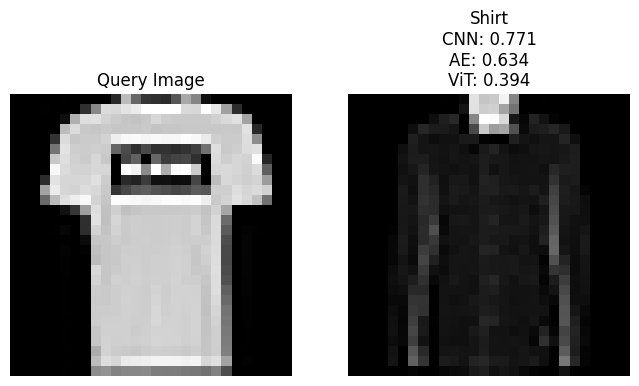

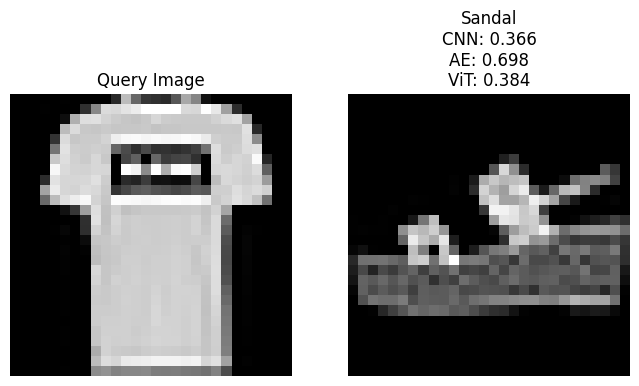

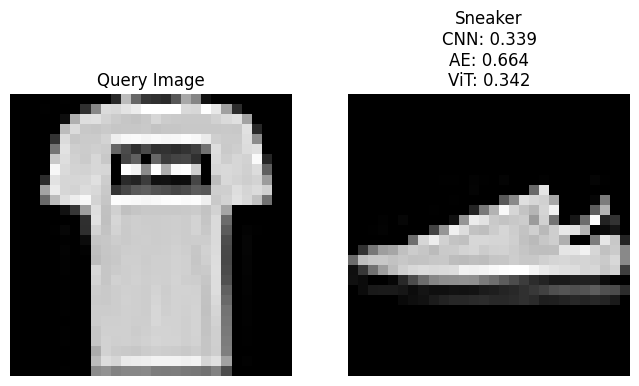

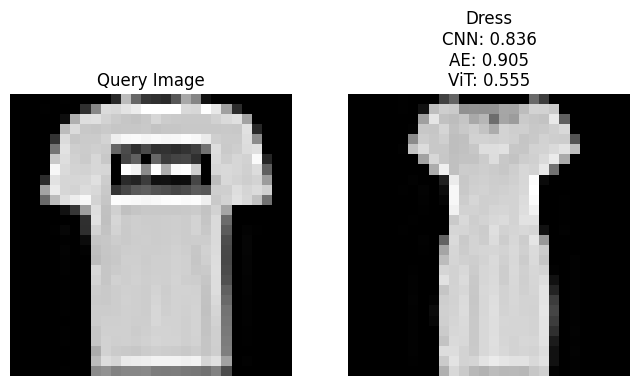


Analyzing Trouser

Comparing with other Trouser images:
--------------------------------------------------


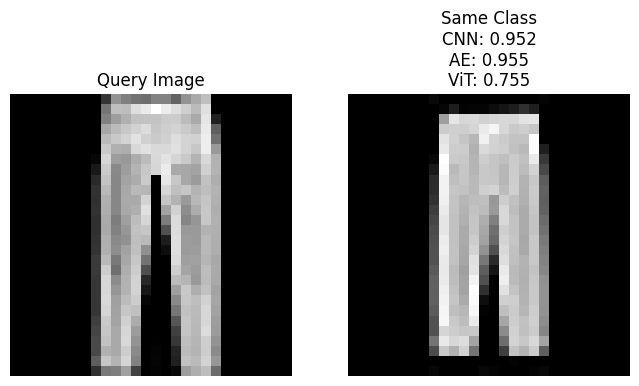

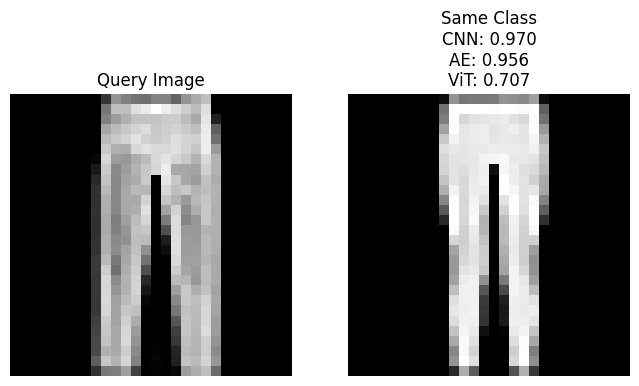

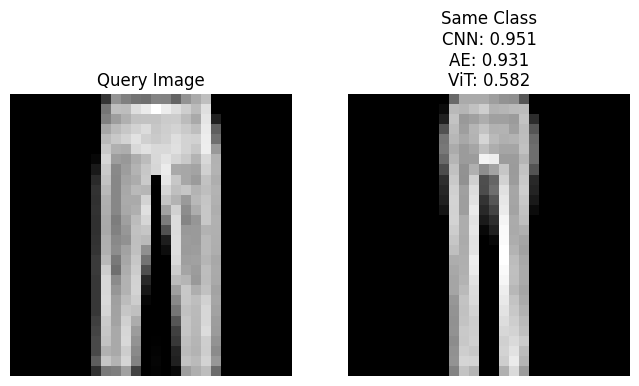

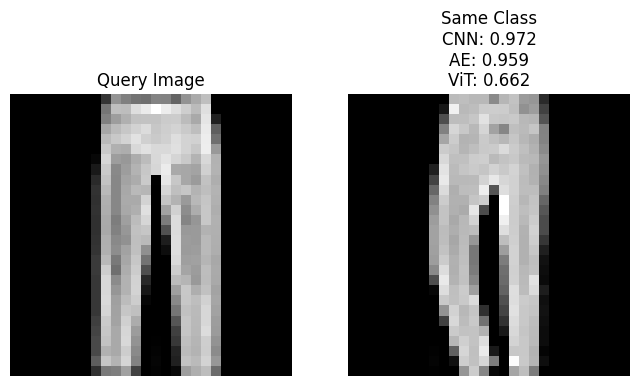

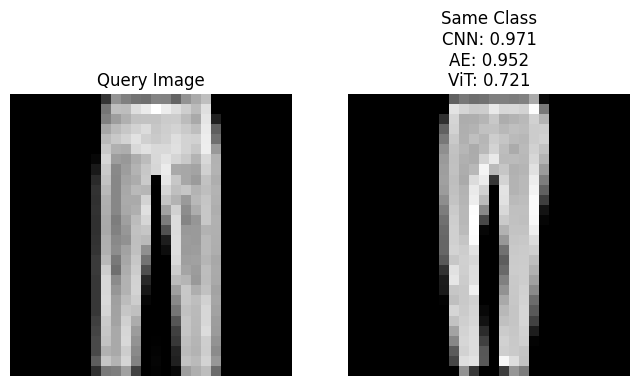


Comparing with other class images:
--------------------------------------------------


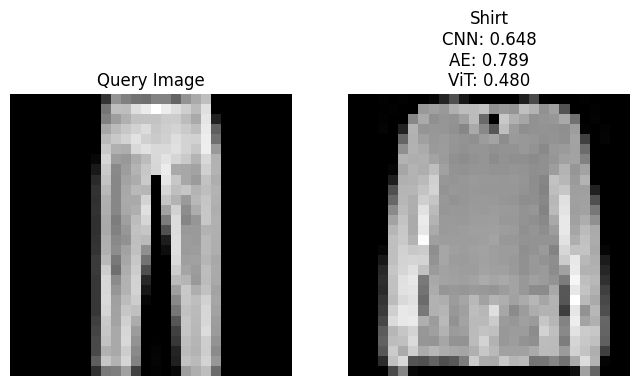

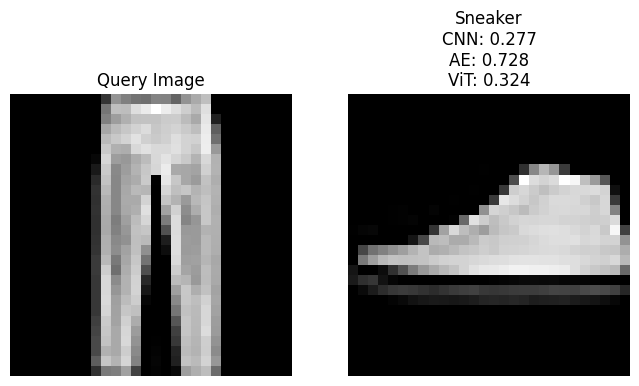

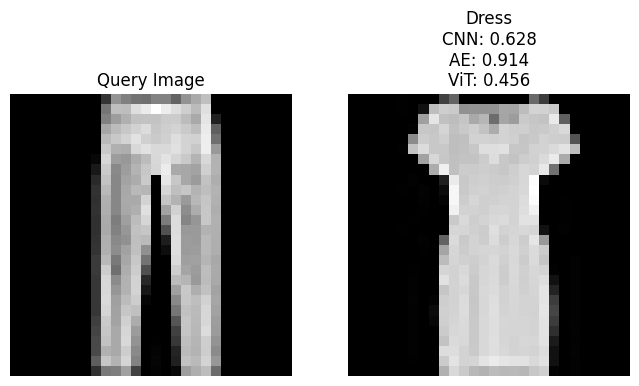

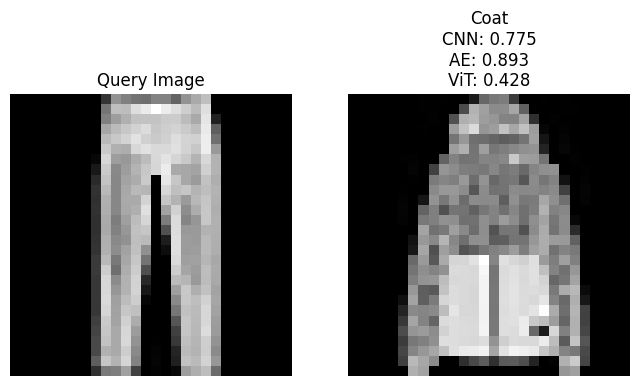

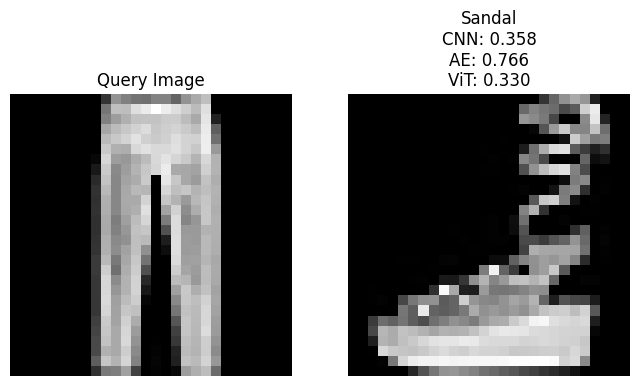


Analyzing Pullover

Comparing with other Pullover images:
--------------------------------------------------


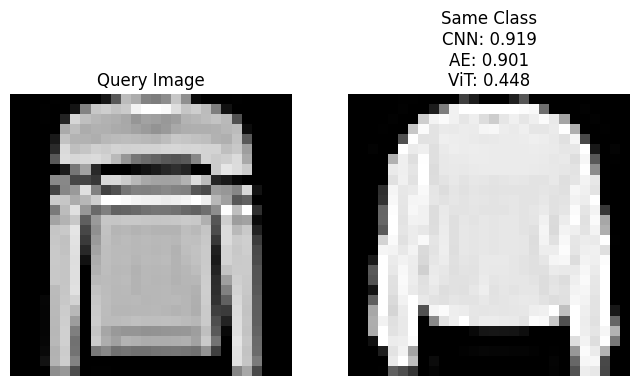

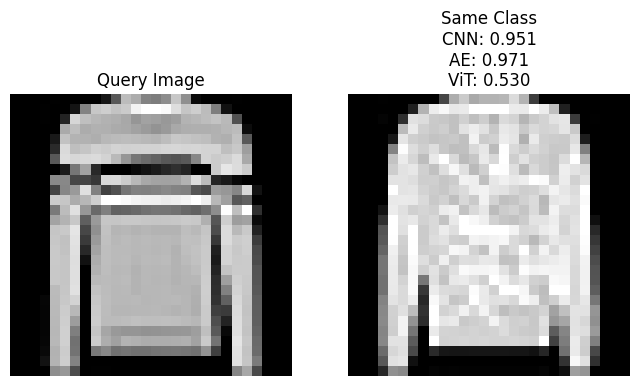

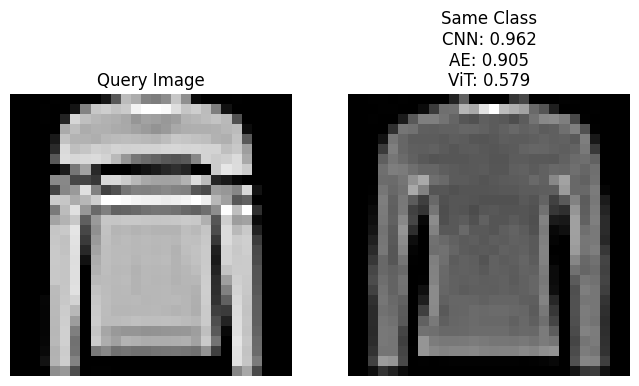

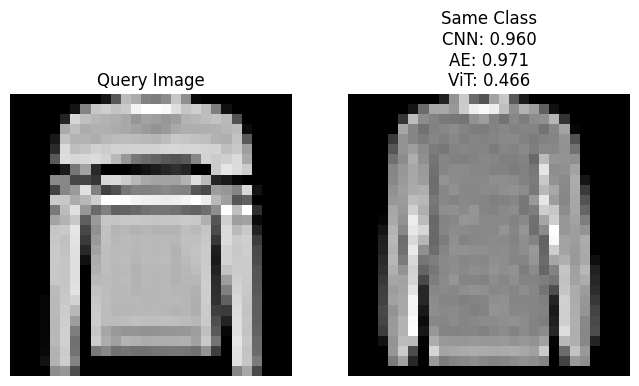

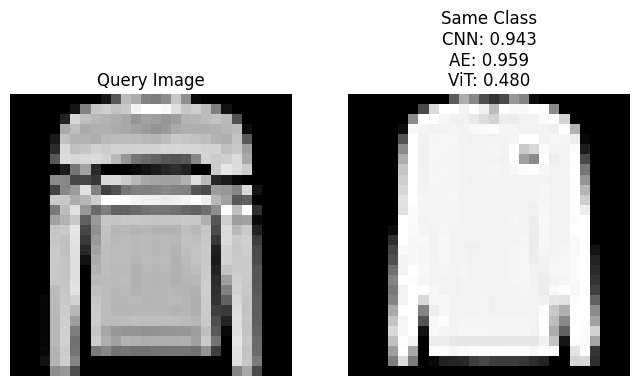


Comparing with other class images:
--------------------------------------------------


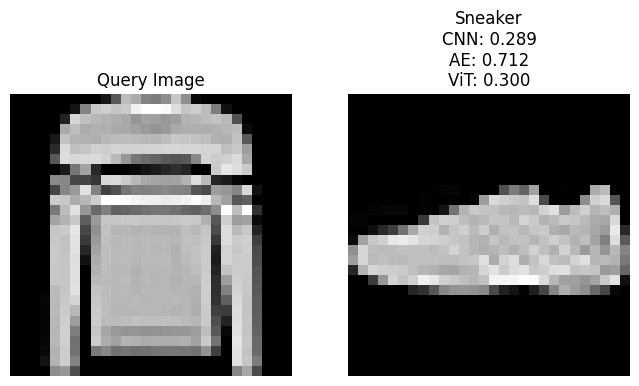

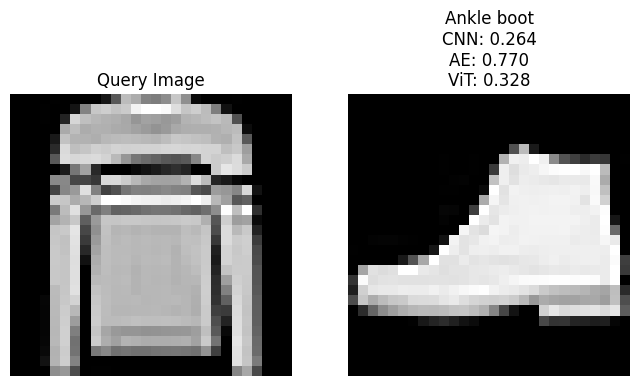

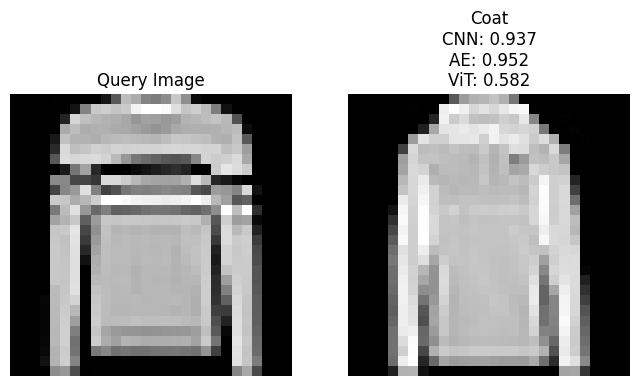

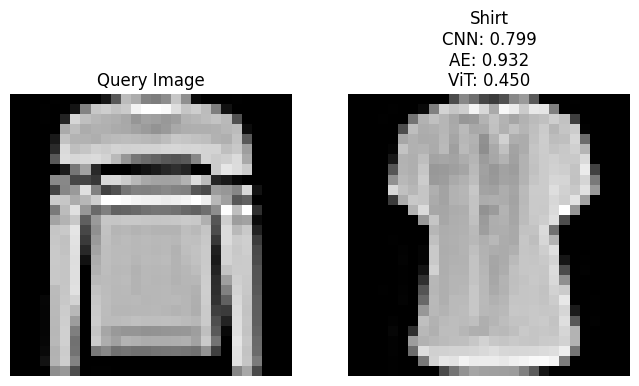

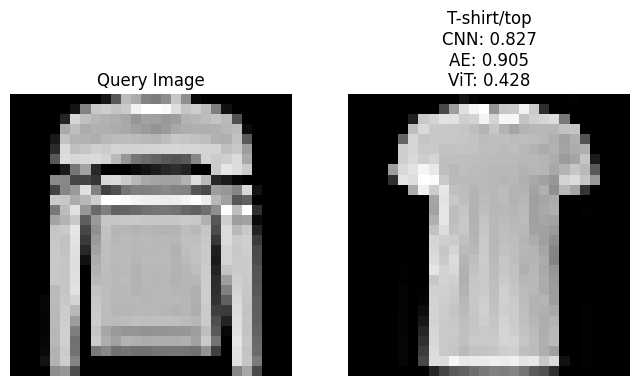


Analyzing Dress

Comparing with other Dress images:
--------------------------------------------------


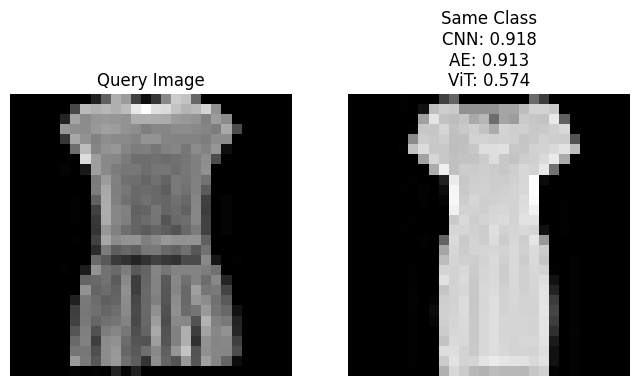

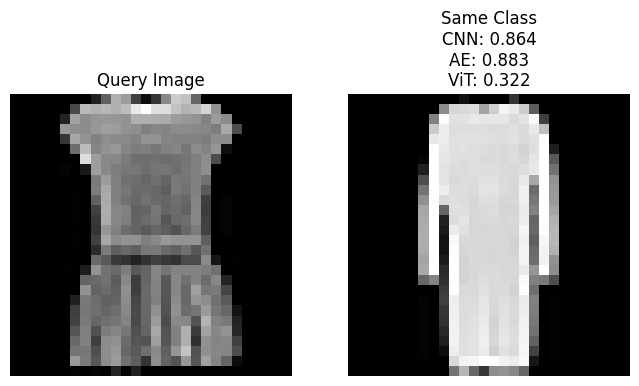

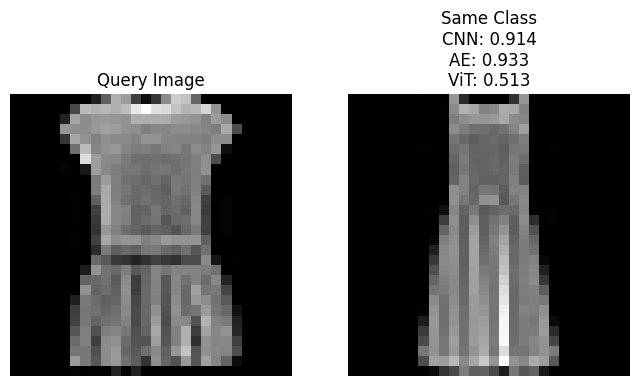

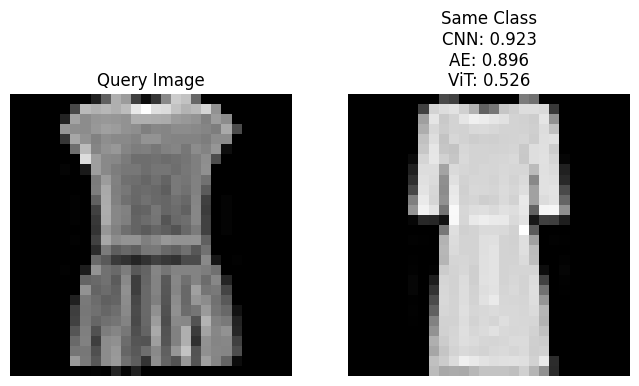

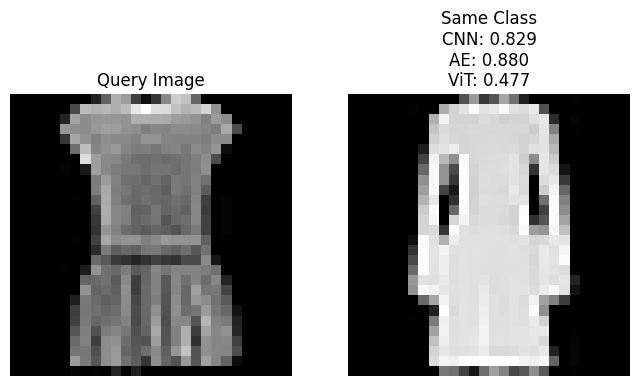


Comparing with other class images:
--------------------------------------------------


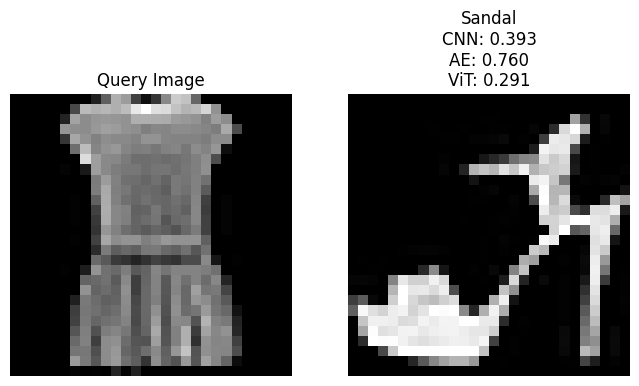

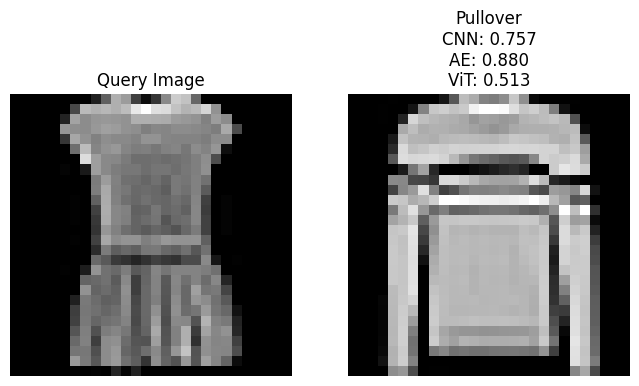

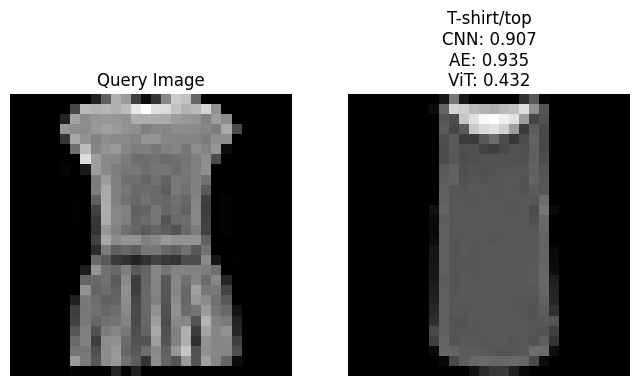

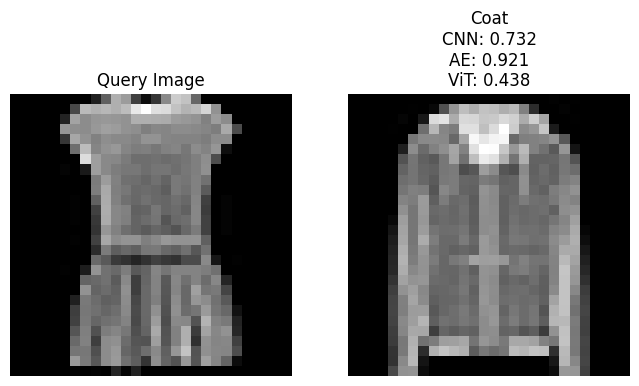

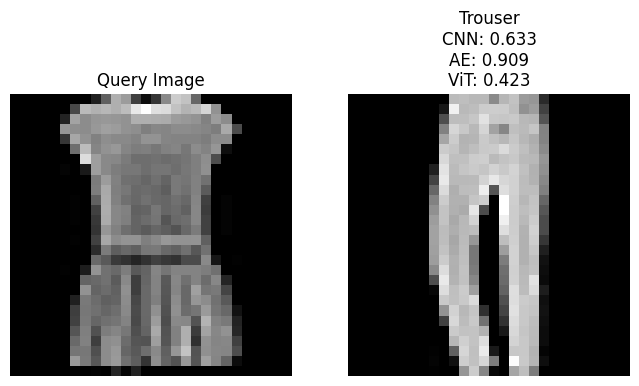


Analyzing Coat

Comparing with other Coat images:
--------------------------------------------------


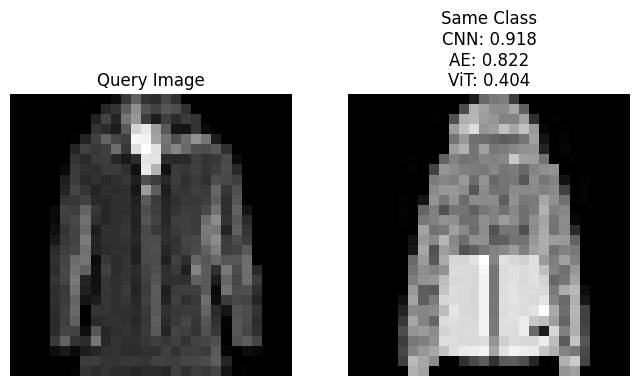

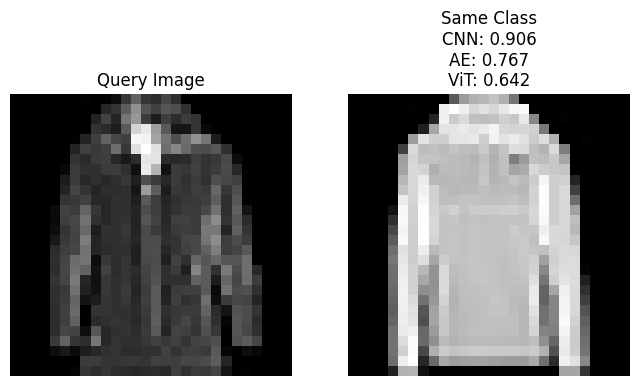

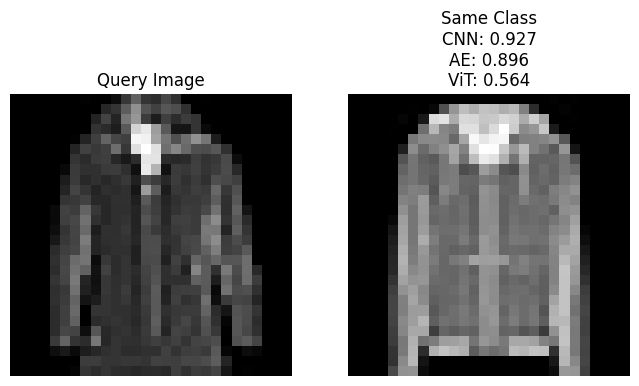

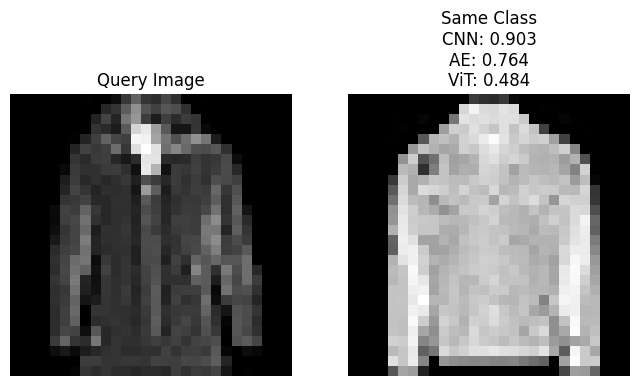

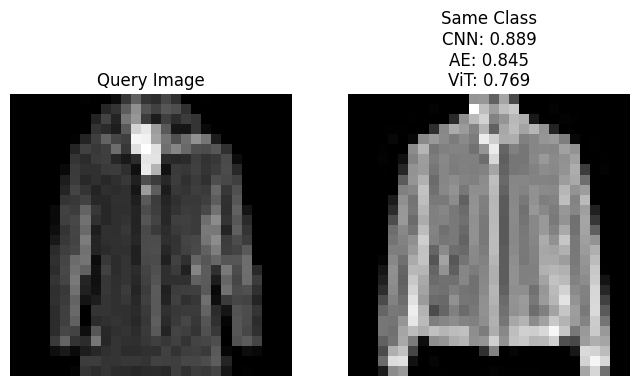


Comparing with other class images:
--------------------------------------------------


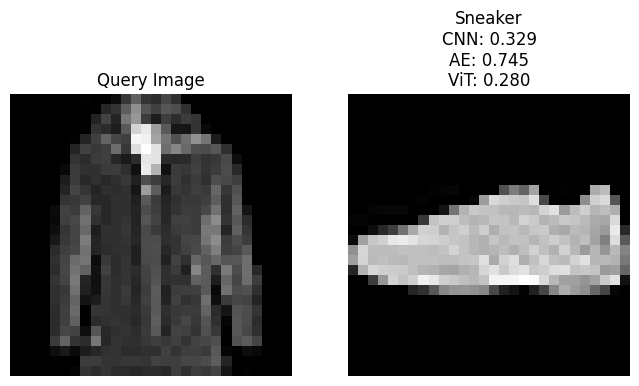

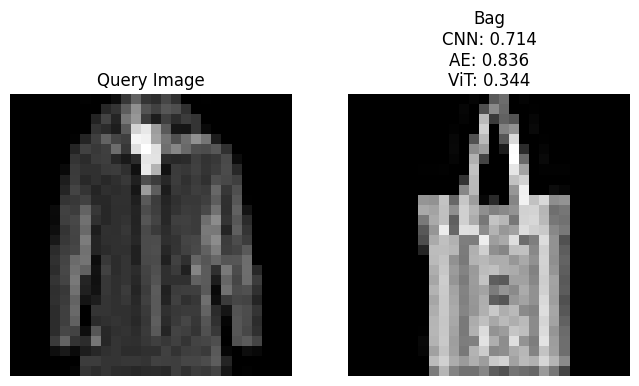

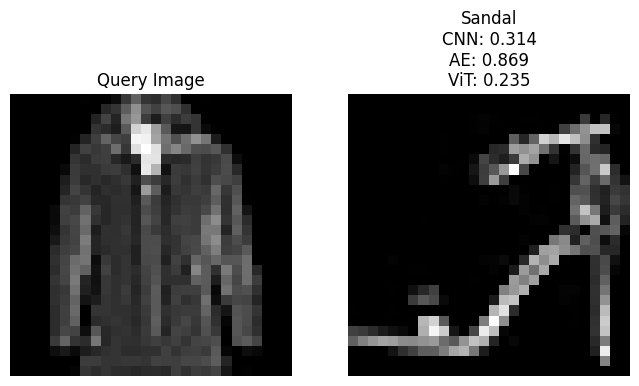

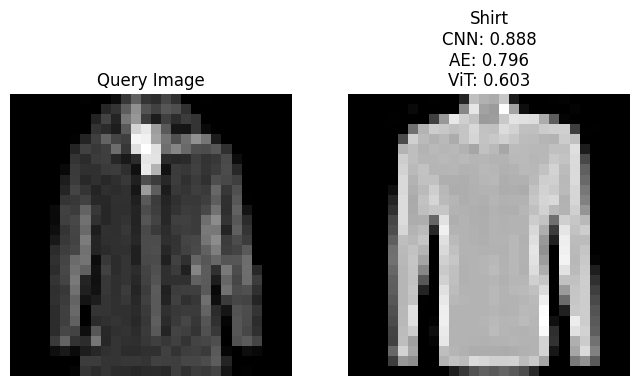

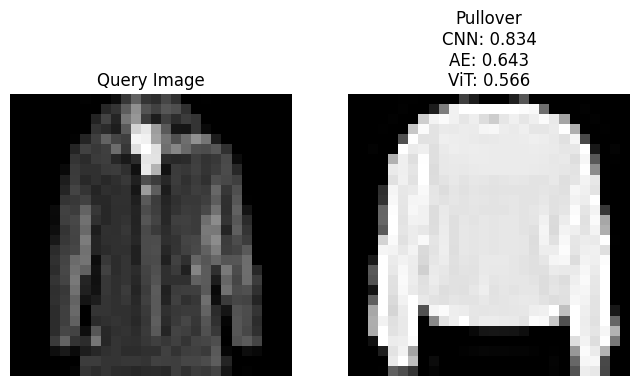


Analyzing Sandal

Comparing with other Sandal images:
--------------------------------------------------


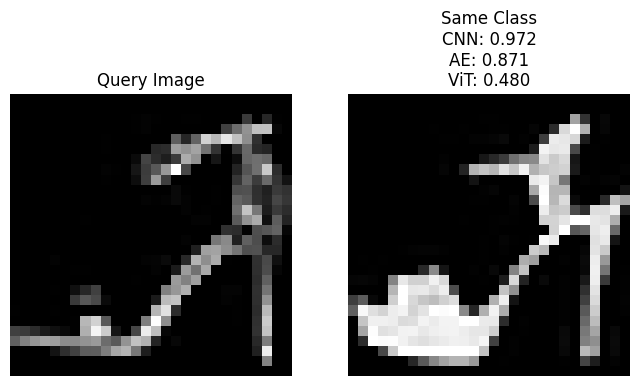

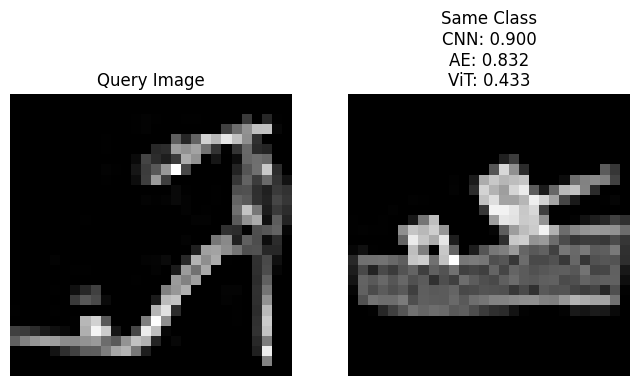

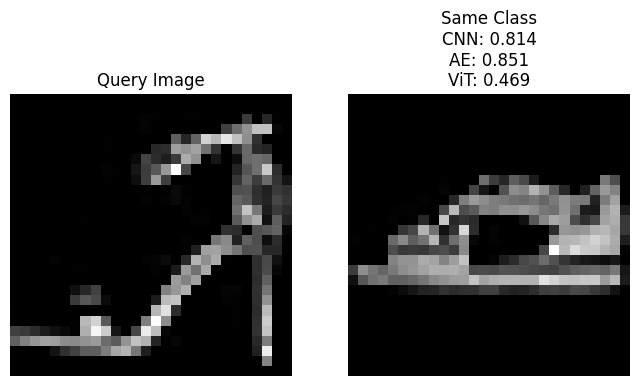

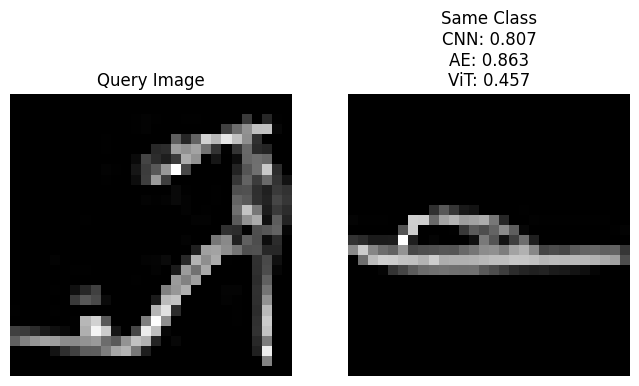

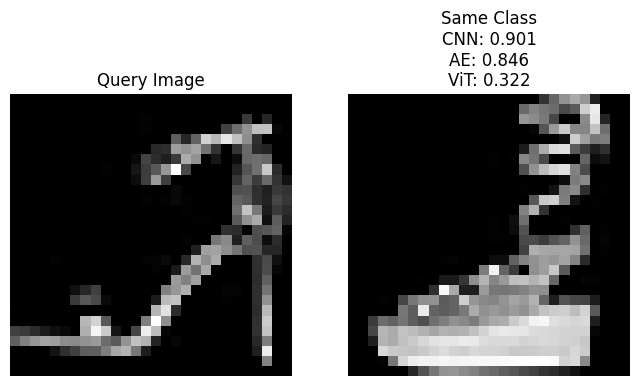


Comparing with other class images:
--------------------------------------------------


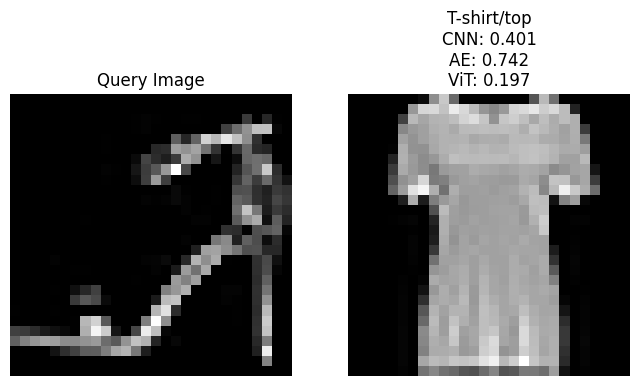

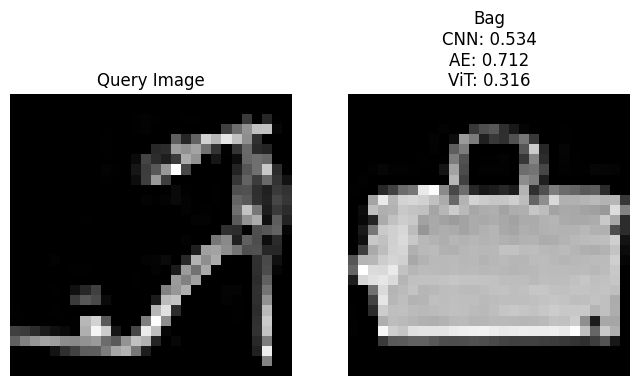

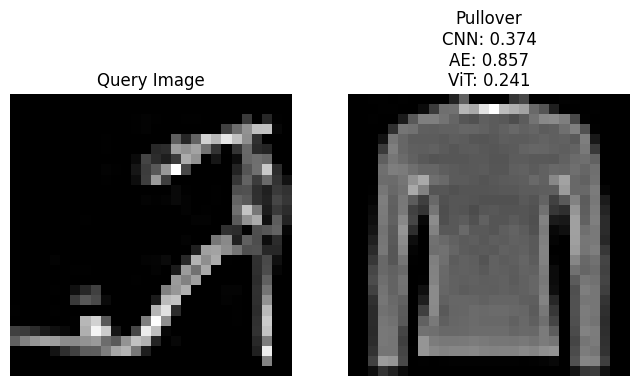

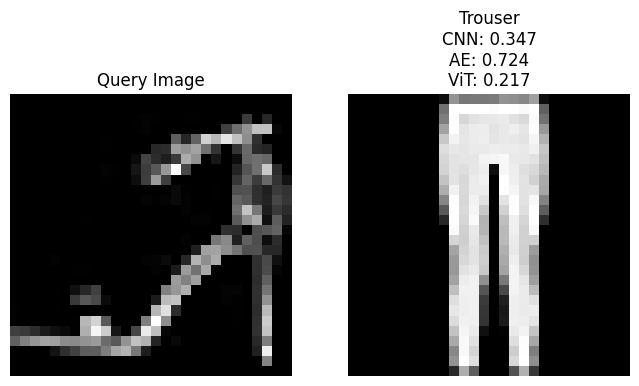

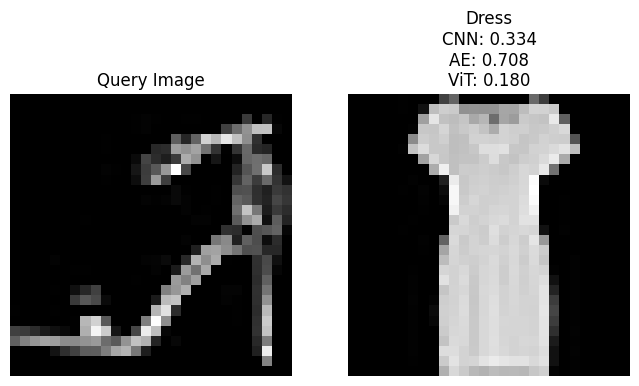


Analyzing Shirt

Comparing with other Shirt images:
--------------------------------------------------


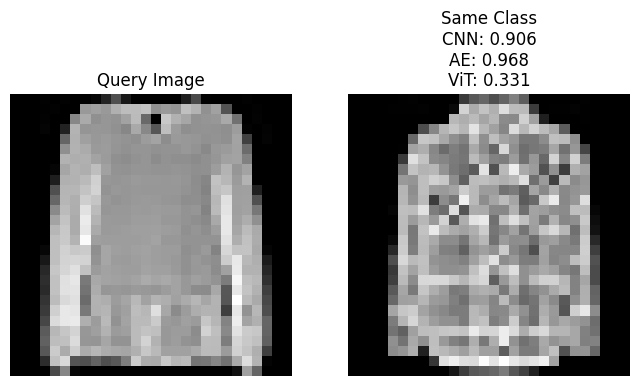

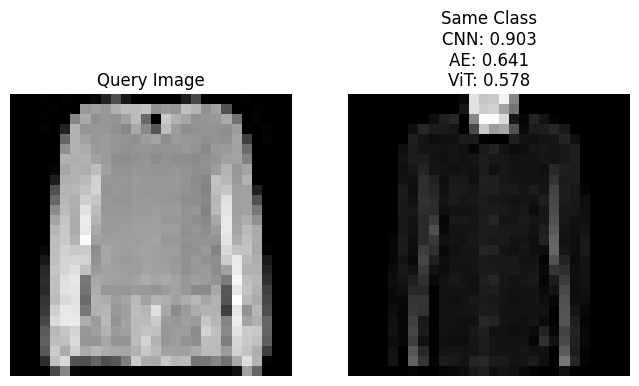

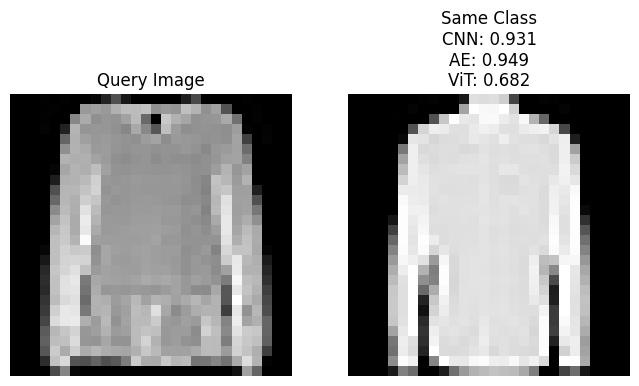

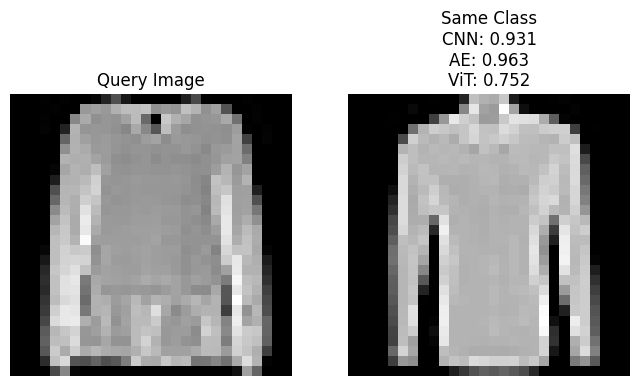

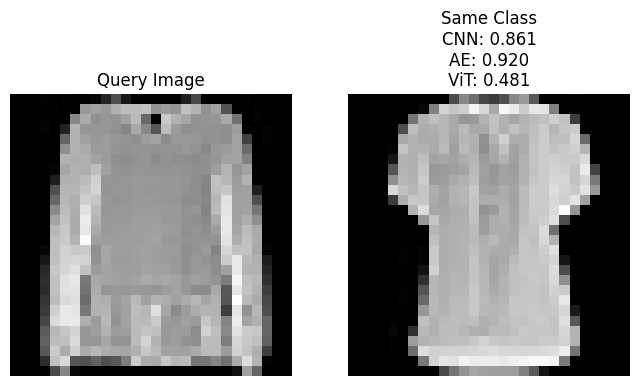


Comparing with other class images:
--------------------------------------------------


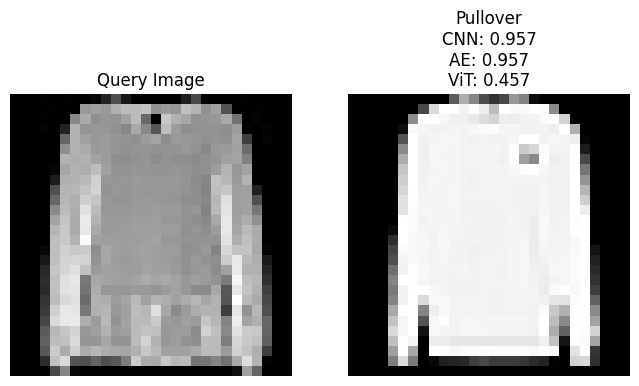

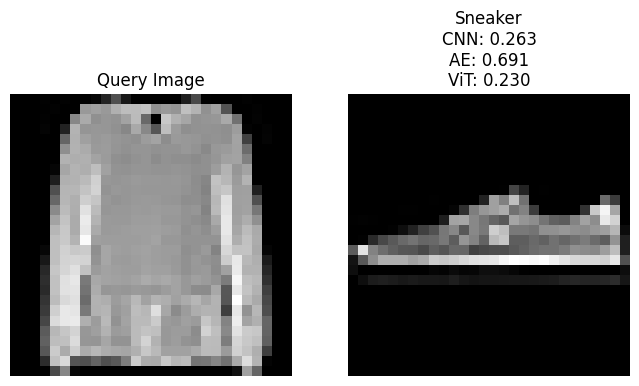

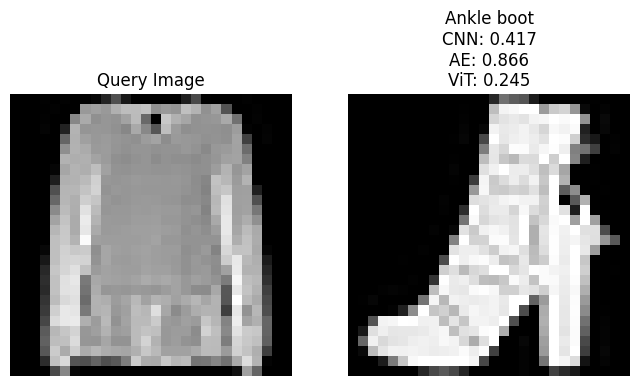

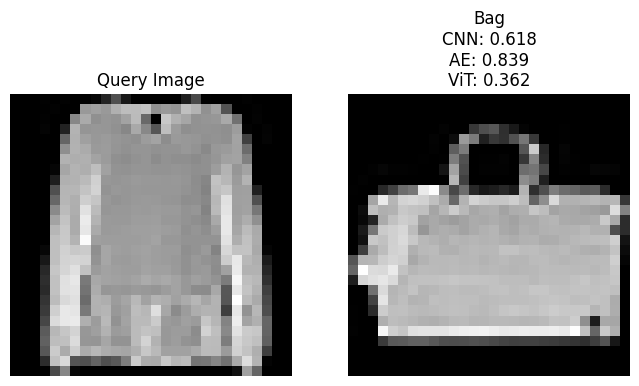

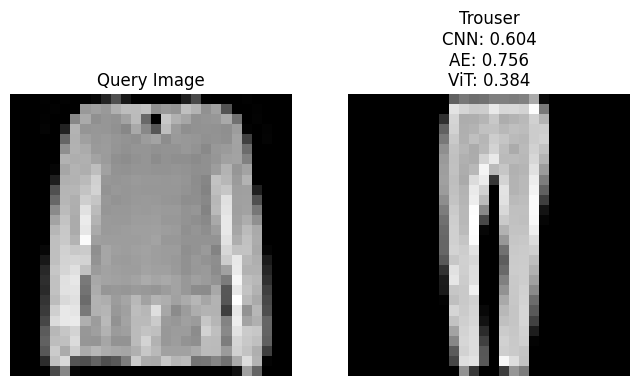


Analyzing Sneaker

Comparing with other Sneaker images:
--------------------------------------------------


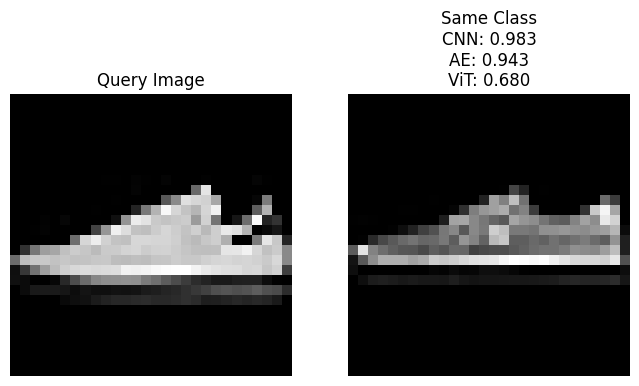

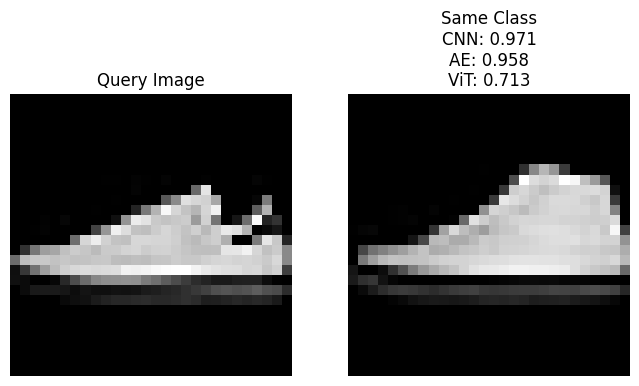

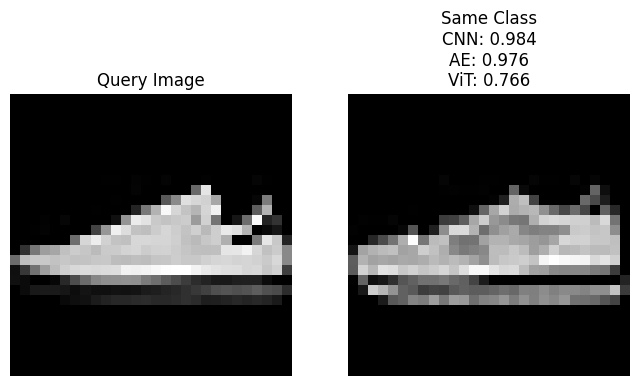

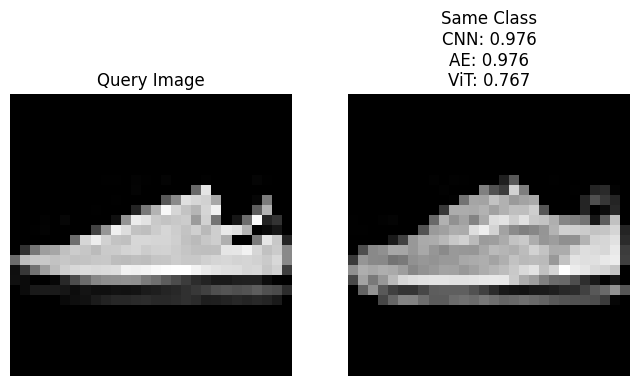

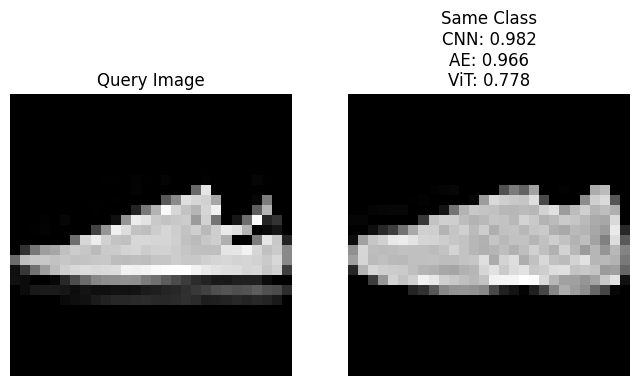


Comparing with other class images:
--------------------------------------------------


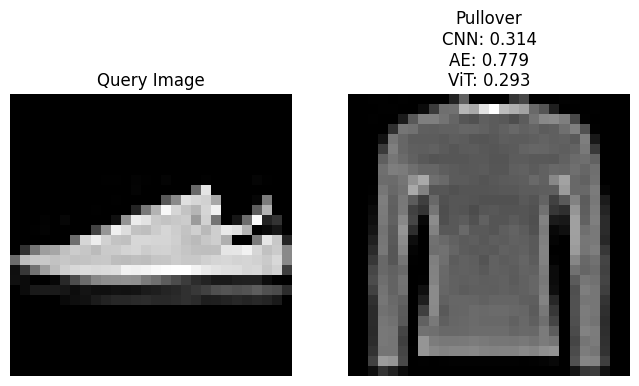

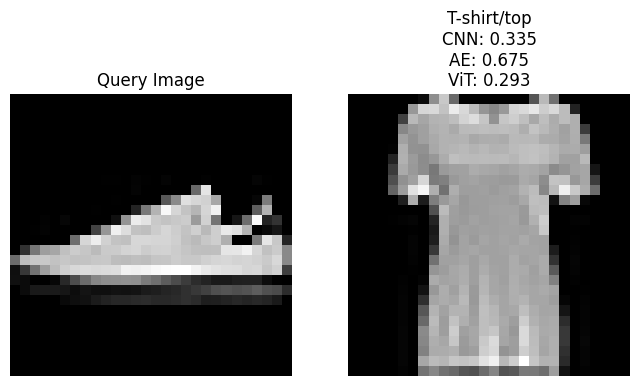

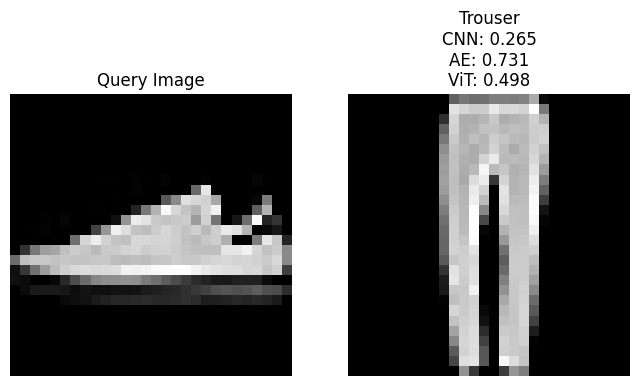

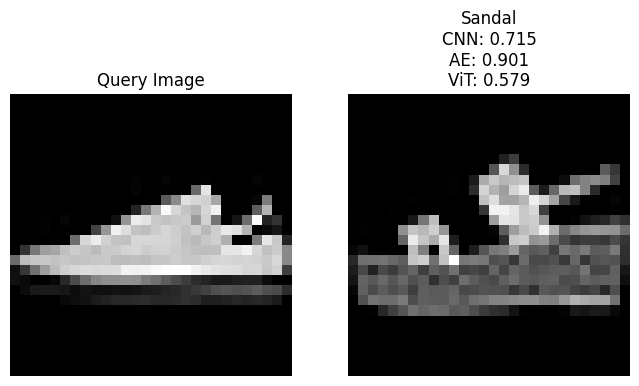

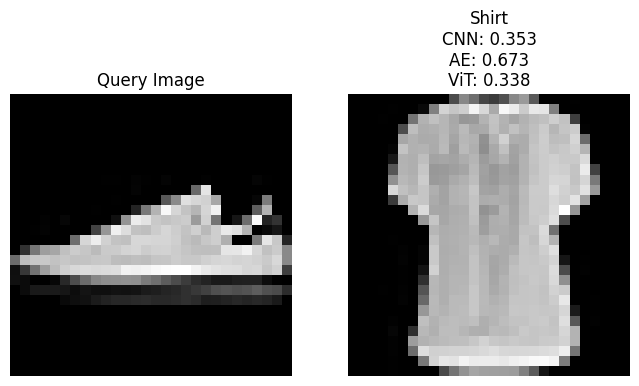


Analyzing Bag

Comparing with other Bag images:
--------------------------------------------------


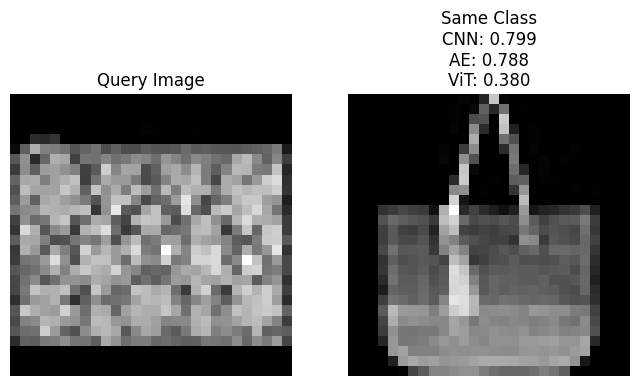

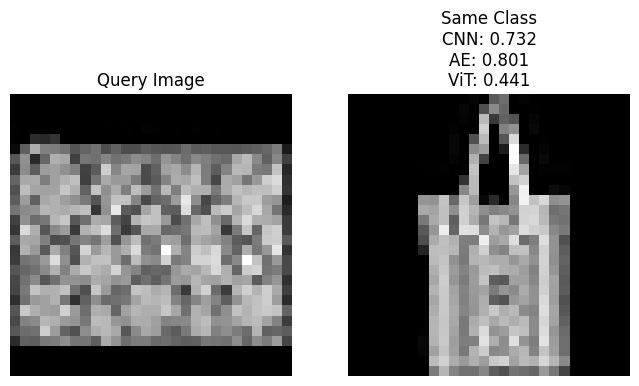

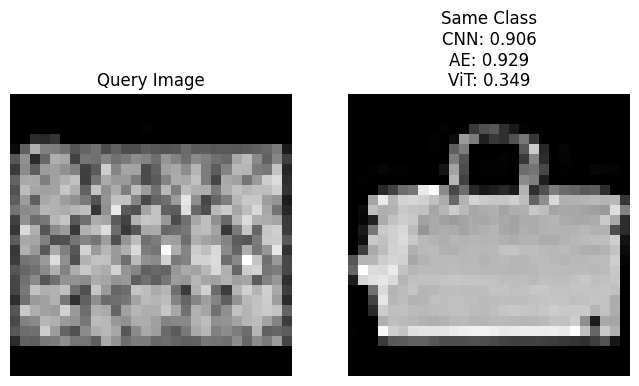

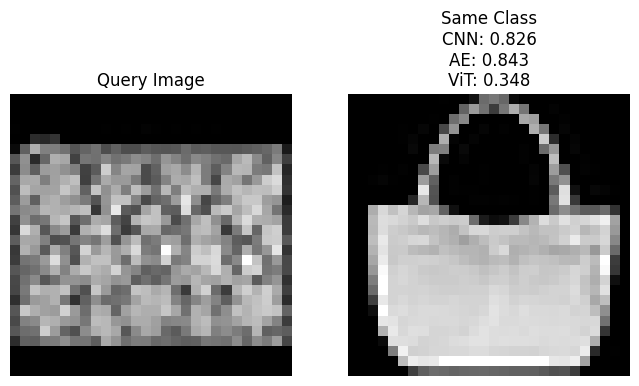

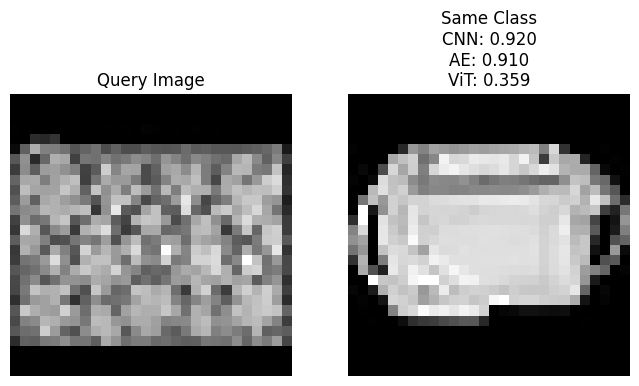


Comparing with other class images:
--------------------------------------------------


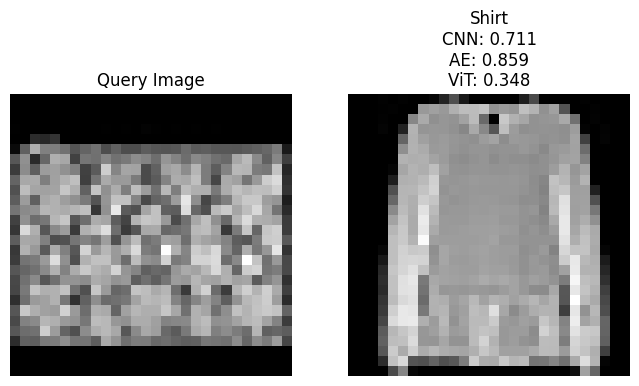

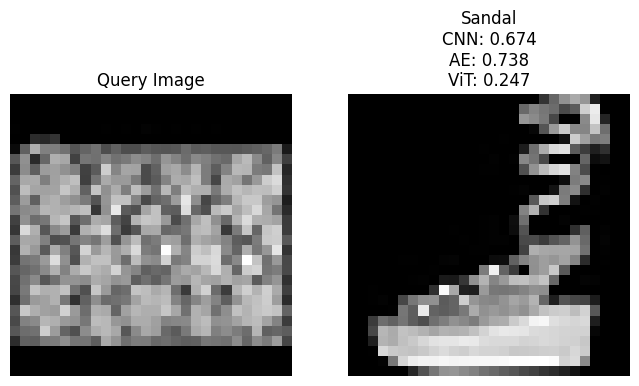

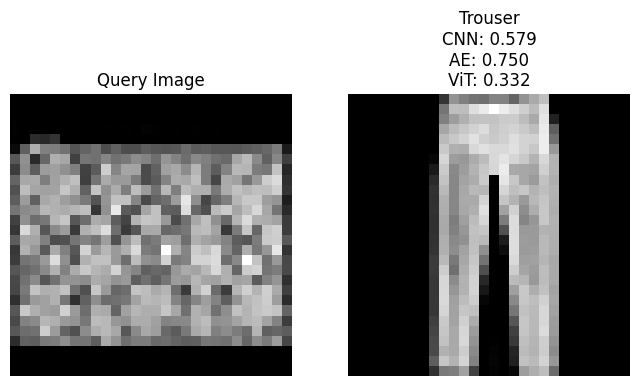

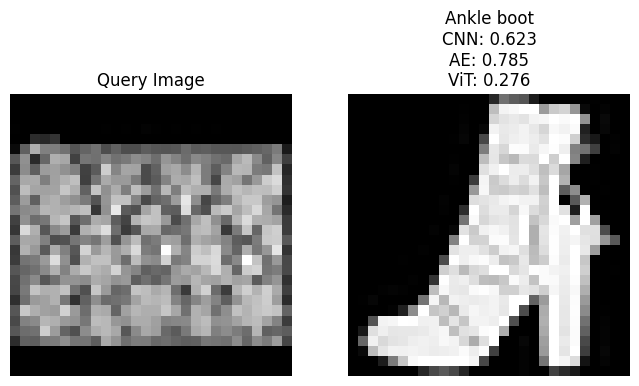

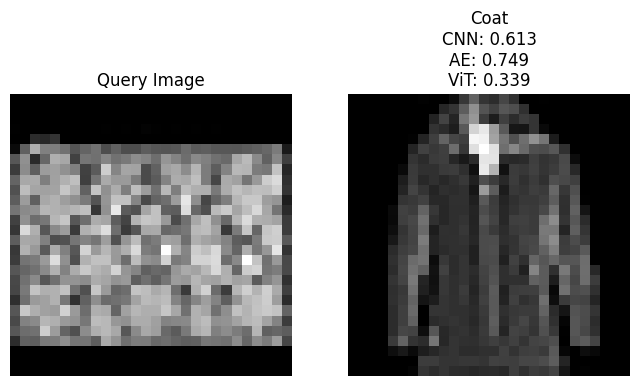


Analyzing Ankle boot

Comparing with other Ankle boot images:
--------------------------------------------------


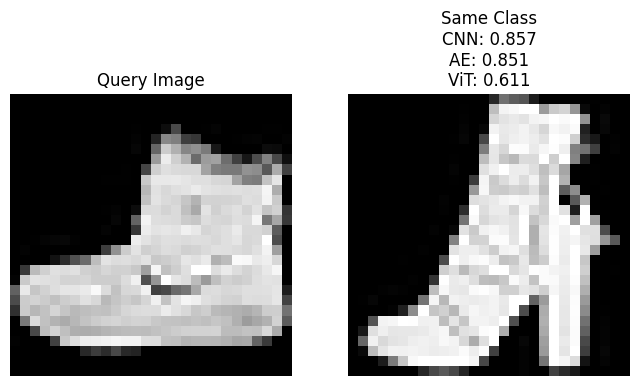

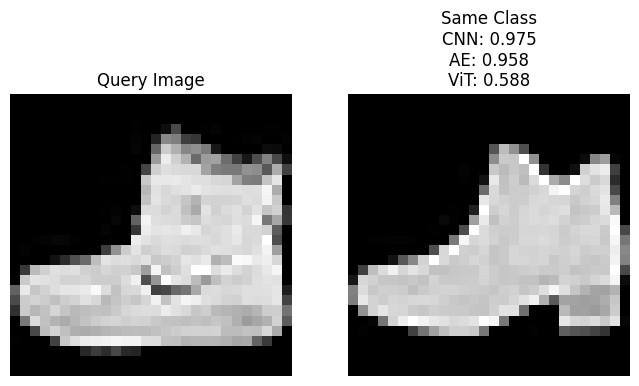

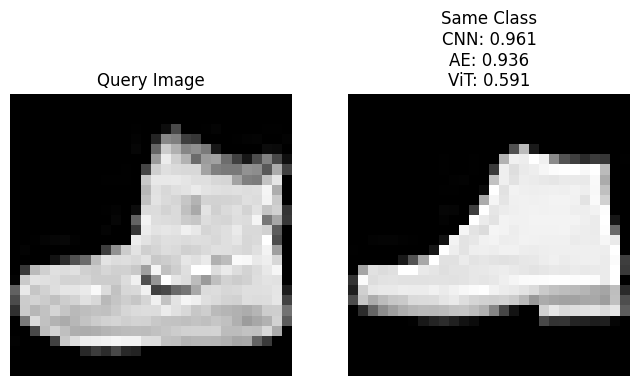

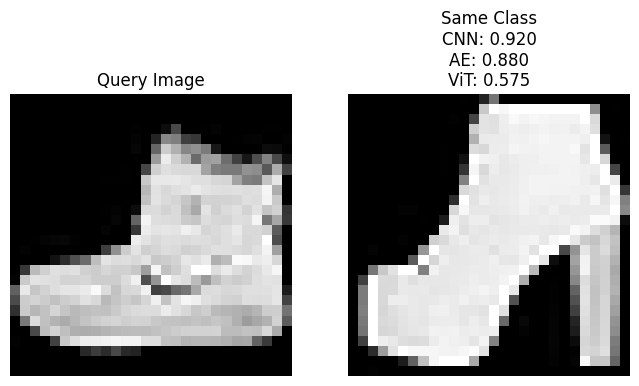

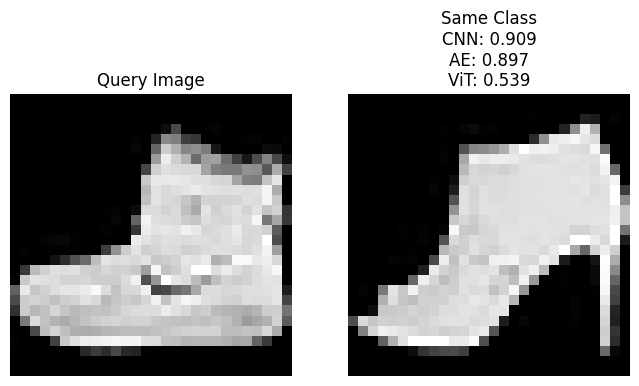


Comparing with other class images:
--------------------------------------------------


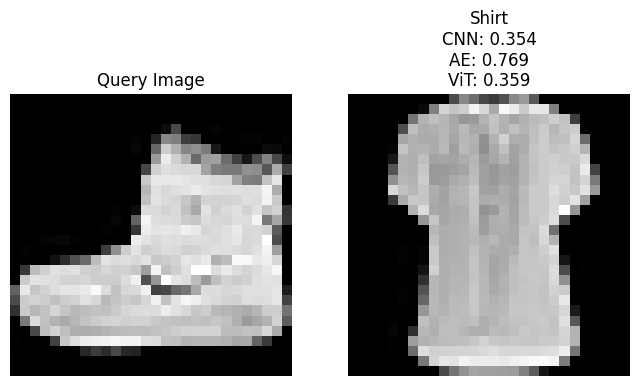

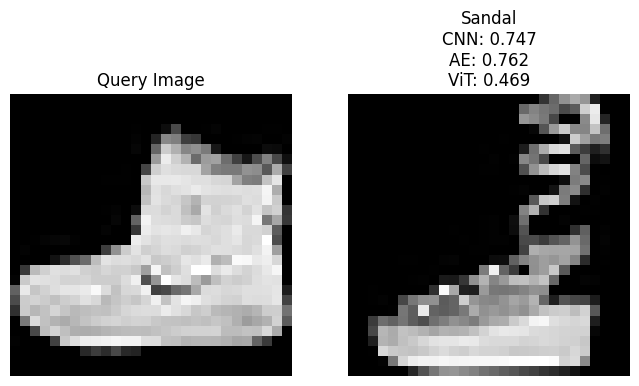

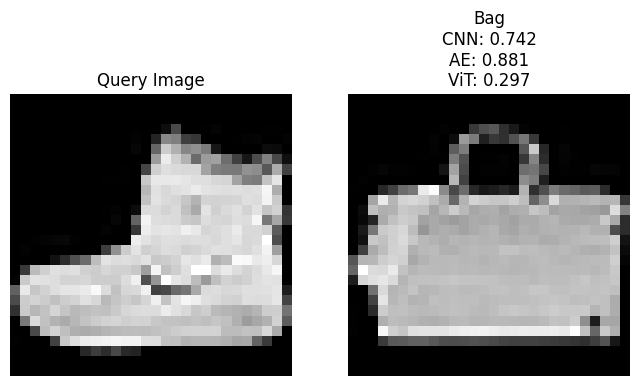

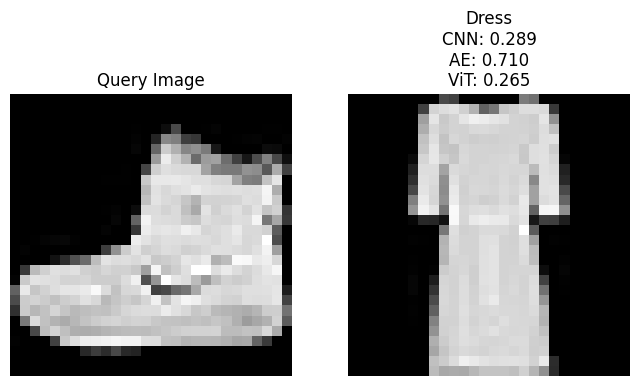

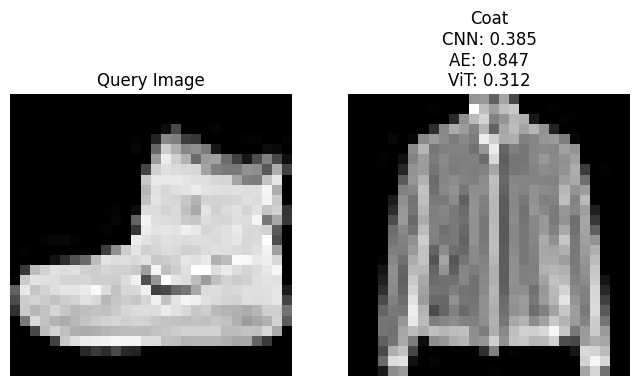

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
import numpy as np
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image

# Simple CNN for feature extraction
class CNNFeatureExtractor(nn.Module):
    def __init__(self):
        super(CNNFeatureExtractor, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        return x

# Autoencoder for feature extraction
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 8, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def encode(self, x):
        return self.encoder(x)

def train_models(train_loader):
    """Train CNN and Autoencoder models"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize models
    cnn = CNNFeatureExtractor().to(device)
    autoencoder = Autoencoder().to(device)

    # Optimizers
    cnn_optimizer = torch.optim.Adam(cnn.parameters())
    ae_optimizer = torch.optim.Adam(autoencoder.parameters())

    # Train CNN with classification head
    temp_classifier = nn.Linear(512, 10).to(device)
    criterion = nn.CrossEntropyLoss()

    print("Training CNN...")
    cnn.train()
    for epoch in range(5):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            cnn_optimizer.zero_grad()
            features = cnn(data)
            output = temp_classifier(features)
            loss = criterion(output, target)
            loss.backward()
            cnn_optimizer.step()
            if batch_idx % 100 == 0:
                print(f'CNN Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                      f'Loss: {loss.item():.6f}]')

    print("\nTraining Autoencoder...")
    autoencoder.train()
    for epoch in range(5):
        for batch_idx, (data, _) in enumerate(train_loader):
            data = data.to(device)
            ae_optimizer.zero_grad()
            output = autoencoder(data)
            loss = F.mse_loss(output, data)
            loss.backward()
            ae_optimizer.step()
            if batch_idx % 100 == 0:
                print(f'AE Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                      f'Loss: {loss.item():.6f}]')

    return cnn, autoencoder

def compute_similarity(feat1, feat2):
    """Compute cosine similarity between feature vectors"""
    return F.cosine_similarity(feat1.unsqueeze(0), feat2.unsqueeze(0)).item()

def extract_features(image, cnn, autoencoder, vit_model, vit_processor, device):
    """Extract features using all three models"""
    # Prepare image
    image_tensor = transforms.ToTensor()(image).unsqueeze(0).to(device)

    # CNN features
    cnn_features = cnn(image_tensor)

    # Autoencoder features
    ae_features = autoencoder.encode(image_tensor).flatten()

    # ViT features
    # Convert to RGB and resize for ViT
    rgb_image = Image.fromarray(np.repeat(image[..., np.newaxis], 3, -1))
    vit_inputs = vit_processor(rgb_image, return_tensors="pt").to(device)
    with torch.no_grad():
        vit_features = vit_model(**vit_inputs).last_hidden_state[:, 0, :]  # Use [CLS] token

    return cnn_features.flatten(), ae_features, vit_features.flatten()

def compare_images(class_images, class_names, cnn, autoencoder, vit_model, vit_processor,
                  n_intra_samples=5, n_inter_samples=5):
    """Compare images using all three models"""
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    cnn.eval()
    autoencoder.eval()

    for class_idx in range(len(class_names)):
        print(f"\n{'='*70}")
        print(f"Analyzing {class_names[class_idx]}")
        print(f"{'='*70}")

        # Get representative image
        representative_img = class_images[class_idx][0]
        rep_cnn_feat, rep_ae_feat, rep_vit_feat = extract_features(
            representative_img, cnn, autoencoder, vit_model, vit_processor, device)

        # Compare with same class
        print(f"\nComparing with other {class_names[class_idx]} images:")
        print("-" * 50)
        for i, intra_img in enumerate(class_images[class_idx][1:n_intra_samples+1], 1):
            cnn_feat, ae_feat, vit_feat = extract_features(
                intra_img, cnn, autoencoder, vit_model, vit_processor, device)

            # Compute similarities
            cnn_sim = compute_similarity(rep_cnn_feat, cnn_feat)
            ae_sim = compute_similarity(rep_ae_feat, ae_feat)
            vit_sim = compute_similarity(rep_vit_feat, vit_feat)

            # Display results
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(representative_img, cmap='gray')
            plt.title("Query Image")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(intra_img, cmap='gray')
            plt.title(f"Same Class\nCNN: {cnn_sim:.3f}\nAE: {ae_sim:.3f}\nViT: {vit_sim:.3f}")
            plt.axis('off')
            plt.show()

        # Compare with other classes
        print(f"\nComparing with other class images:")
        print("-" * 50)
        other_classes = list(range(10))
        other_classes.remove(class_idx)
        selected_classes = random.sample(other_classes, n_inter_samples)

        for other_class in selected_classes:
            inter_img = random.choice(class_images[other_class])
            cnn_feat, ae_feat, vit_feat = extract_features(
                inter_img, cnn, autoencoder, vit_model, vit_processor, device)

            # Compute similarities
            cnn_sim = compute_similarity(rep_cnn_feat, cnn_feat)
            ae_sim = compute_similarity(rep_ae_feat, ae_feat)
            vit_sim = compute_similarity(rep_vit_feat, vit_feat)

            # Display results
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(representative_img, cmap='gray')
            plt.title("Query Image")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(inter_img, cmap='gray')
            plt.title(f"{class_names[other_class]}\nCNN: {cnn_sim:.3f}\nAE: {ae_sim:.3f}\nViT: {vit_sim:.3f}")
            plt.axis('off')
            plt.show()

def main():
    # Load dataset
    transform = transforms.ToTensor()
    train_dataset = FashionMNIST(root="./data", train=True, download=True, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    # Train CNN and Autoencoder
    cnn, autoencoder = train_models(train_loader)

    # Load ViT model and processor
    vit_processor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
    vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    vit_model = vit_model.to(device)

    # Create dictionary to store images by class
    class_images = {i: [] for i in range(10)}
    for img, label in train_dataset:
        if len(class_images[label]) < 6:  # 1 representative + 5 samples
            class_images[label].append((img.squeeze().numpy() * 255).astype("uint8"))

    # Compare images using all models
    compare_images(class_images, class_names, cnn, autoencoder, vit_model, vit_processor)

if __name__ == "__main__":
    main()

In general CNN and Vit are working the best as they are getting the most understanding of the features whereas Autoencoder is mismatching sometimes. There is only one case of bag where the test image is not much clear so the models are mismatching.